In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [76]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [77]:
data_train=pd.read_csv("/content/gdrive/MyDrive/train.csv",';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [78]:
data_test=pd.read_csv("/content/gdrive/MyDrive/test.csv",';')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
data_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [19]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [20]:
data_test.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
data_test.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [22]:
data_train.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
data_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [24]:
data_test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [25]:
data_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000


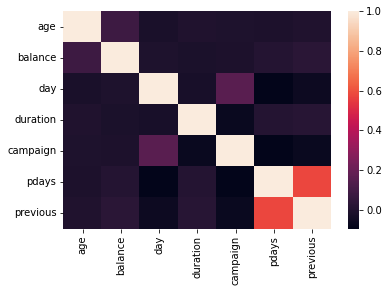

In [26]:
print(data_test[['age','balance','day','duration','campaign','pdays','previous']].corr())

sns.heatmap(data_test[['age','balance','day','duration','campaign','pdays','previous']].corr())

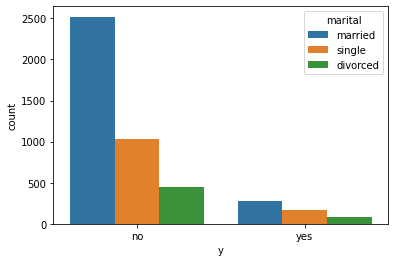

In [27]:
sns.countplot(x='y',data=data_test,hue='marital') # so we see that the maried people does not subscribe the most (almost 2500) and we have most of the person who accept to subscribe are married people 

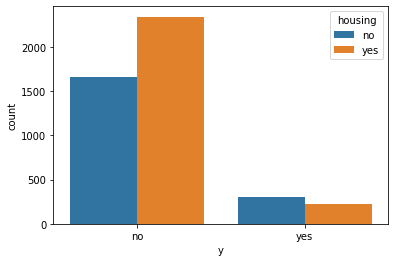

In [28]:
sns.countplot(x='y',data=data_test,hue='housing') #les gens qui n'ont pas de maison souscrive le plus.

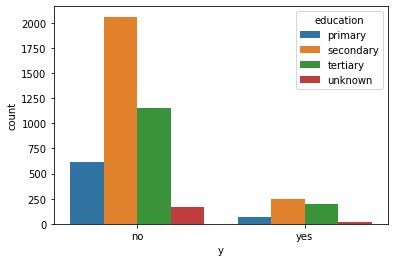

In [29]:
sns.countplot(x='y',data=data_test,hue='education')

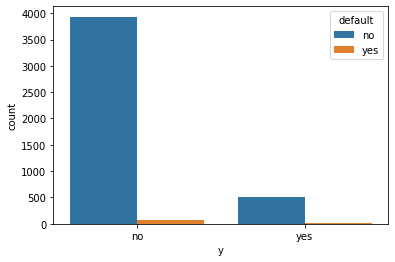

In [30]:
sns.countplot(x='y',data=data_test,hue='default')

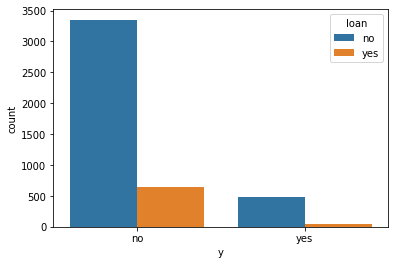

In [31]:
sns.countplot(x='y',data=data_test,hue='loan')

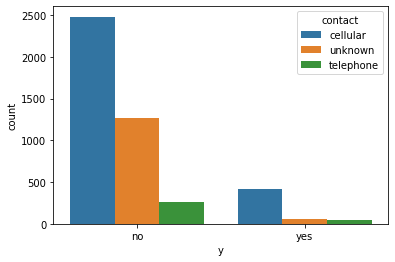

In [32]:
sns.countplot(x='y',data=data_test,hue='contact')

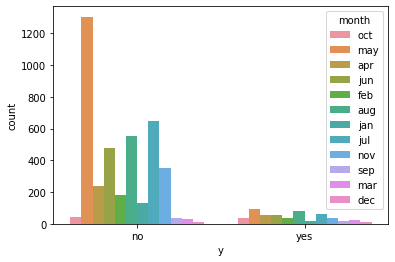

In [33]:
sns.countplot(x='y',data=data_test,hue='month')

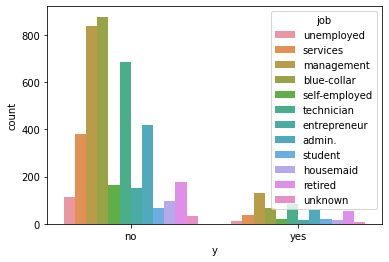

In [34]:
sns.countplot(x='y',data=data_test,hue='job')

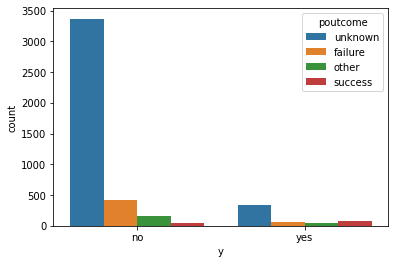

In [35]:
sns.countplot(x='y',data=data_test,hue='poutcome')

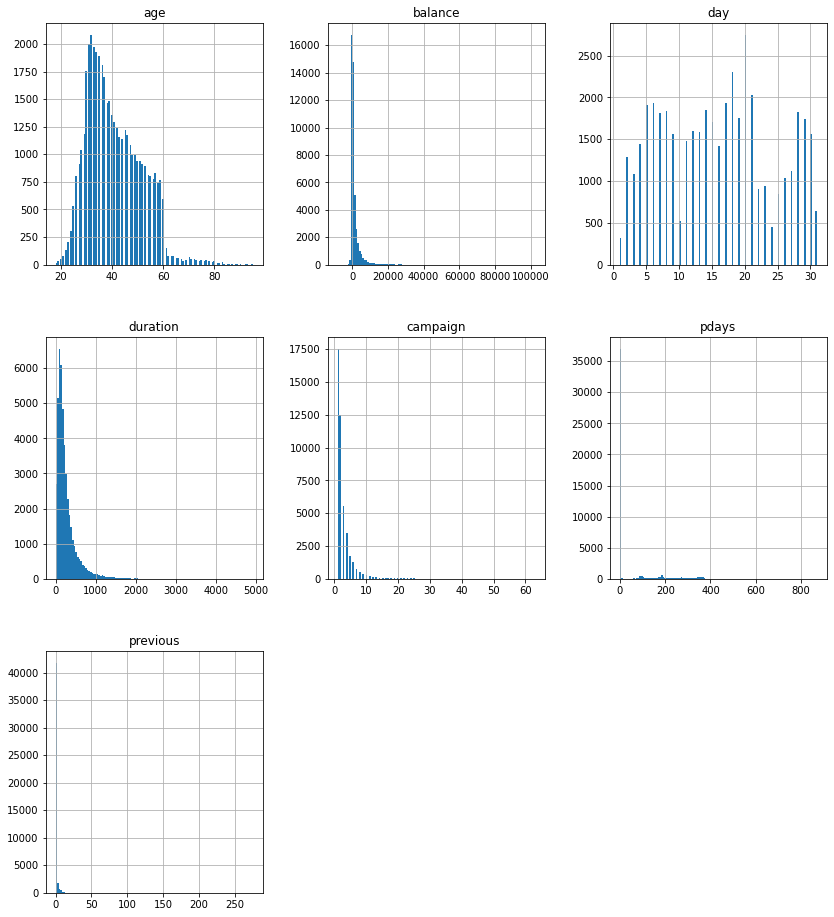

In [36]:
# Present the distribution of each column 
data_train.hist(bins = 120, figsize=(14,16)) 
plt.show()

In [37]:
gender=pd.get_dummies(data_test['job'],drop_first=True)

In [38]:
numeric_cols = data_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data_train.select_dtypes('object').columns.tolist()

In [39]:
data_train[numeric_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [40]:
data_test[categorical_cols].nunique() # for exemple we have 4 categories in the categorie education which are "primary","secondary",...

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

In [41]:
data_train[categorical_cols].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [42]:
data_train[numeric_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
scaler.fit(data_train[numeric_cols])

MinMaxScaler()

In [46]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[18.0, -8019.0, 1.0, 0.0, 1.0, -1.0, 0.0]

In [47]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[95.0, 102127.0, 31.0, 4918.0, 63.0, 871.0, 275.0]

In [48]:
data_train[numeric_cols] = scaler.transform(data_train[numeric_cols])

data_test[numeric_cols] = scaler.transform(data_test[numeric_cols])

In [49]:
data_train[numeric_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.297873,0.085171,0.493547,0.052494,0.028449,0.047245,0.002110
std,0.137906,0.027643,0.277416,0.052364,0.049968,0.114827,0.008376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.073457,0.233333,0.020943,0.000000,0.000000,0.000000
50%,0.272727,0.076871,0.500000,0.036600,0.016129,0.000000,0.000000
75%,0.389610,0.085768,0.666667,0.064864,0.032258,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
data_train[categorical_cols].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

**Dealing with imbalancing**

In [51]:
new_data = data_train.copy()
from sklearn.model_selection import train_test_split
feat = new_data.drop("y",axis=1)
targ = new_data["y"]

In [52]:
targ

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [53]:
targ.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

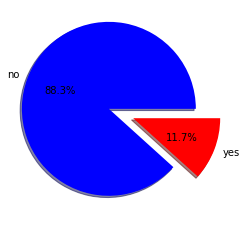

In [54]:
# Initially 
plt.pie(targ.value_counts(), labels = ["no", 'yes'], colors = ['blue', 'red'], autopct = '%1.1f%%', shadow = True, explode = [0.2, 0.1])
plt.show()

In [55]:
# Manage the imbalance

from imblearn.under_sampling import RandomUnderSampler

sampler= RandomUnderSampler()

features,target= sampler.fit_resample(feat, targ)
target.value_counts()

no     5289
yes    5289
Name: y, dtype: int64

In [56]:
target.shape

(10578,)

In [57]:
features.shape

(10578, 16)

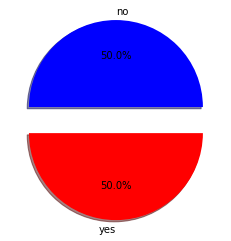

In [58]:
# After dealing with imbalacing
plt.pie(target.value_counts(), labels = ["no", 'yes'], colors = ['blue', 'red'], autopct = '%1.1f%%', shadow = True, explode = [0.2, 0.1])
plt.show()


In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [61]:
encoder1 = OneHotEncoder(sparse=True, handle_unknown='ignore')

In [62]:
encoder.fit(data_train[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [63]:
encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object),
 array(['failure', 'other', 'success', 'unknown'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [64]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_no', 'y_yes']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Transform categorical data to numerical data**

In [65]:
data_train[encoded_cols] = encoder.transform(data_train[categorical_cols])
data_test[encoded_cols] = encoder.transform(data_test[categorical_cols])


In [66]:
pd.set_option('display.max_columns', None)

In [67]:
data_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,0.133333,may,0.053070,0.000000,0.000000,0.000000,unknown,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,0.133333,may,0.030704,0.000000,0.000000,0.000000,unknown,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,0.133333,may,0.015453,0.000000,0.000000,0.000000,unknown,no,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,0.133333,may,0.018707,0.000000,0.000000,0.000000,unknown,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,0.133333,may,0.040260,0.000000,0.000000,0.000000,unknown,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,technician,married,tertiary,no,0.080293,no,no,cellular,0.533333,nov,0.198658,0.032258,0.000000,0.000000,unknown,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
45207,0.688312,retired,divorced,primary,no,0.088501,no,no,cellular,0.533333,nov,0.092721,0.016129,0.000000,0.000000,unknown,yes,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
45208,0.701299,retired,married,secondary,no,0.124689,no,no,cellular,0.533333,nov,0.229158,0.064516,0.212156,0.010909,success,yes,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45209,0.506494,blue-collar,married,secondary,no,0.078868,no,no,telephone,0.533333,nov,0.103294,0.048387,0.000000,0.000000,unknown,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [68]:
data_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,0.155844,unemployed,married,primary,no,0.089027,no,no,cellular,0.600000,oct,0.016063,0.000000,0.000000,0.000000,unknown,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.194805,services,married,secondary,no,0.116282,yes,yes,cellular,0.333333,may,0.044734,0.000000,0.389908,0.014545,failure,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.220779,management,single,tertiary,no,0.085060,yes,no,cellular,0.500000,apr,0.037617,0.000000,0.379587,0.003636,failure,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.155844,management,married,tertiary,no,0.086204,yes,yes,unknown,0.066667,jun,0.040464,0.048387,0.000000,0.000000,unknown,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.532468,blue-collar,married,secondary,no,0.072803,yes,no,unknown,0.133333,may,0.045954,0.000000,0.000000,0.000000,unknown,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.194805,services,married,secondary,no,0.069780,yes,no,cellular,0.966667,jul,0.066897,0.064516,0.000000,0.000000,unknown,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4517,0.506494,self-employed,married,tertiary,yes,0.042725,yes,yes,unknown,0.266667,may,0.031110,0.000000,0.000000,0.000000,unknown,no,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4518,0.506494,technician,married,secondary,no,0.075482,no,no,cellular,0.600000,aug,0.030704,0.161290,0.000000,0.000000,unknown,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4519,0.129870,blue-collar,married,secondary,no,0.083126,no,no,cellular,0.166667,feb,0.026230,0.048387,0.243119,0.010909,other,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


**Standardization of the data**

In [69]:
#Performing Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_train = sc.fit_transform(data_train[encoded_cols])
data_test = sc.transform(data_test[encoded_cols])

In [ ]:
mean = data_train.mean(axis=0)
# Note that "train_data -= mean" is the same as "train_data = train_data - mean"
# The "/=" operation is the same but with division.
data_train -= mean 
std = data_train.std(axis=0)
data_train /= std

data_test -= mean
data_test /= std

In [ ]:
data_train.shape

(45211, 17)

In [70]:
data_train

array([[-0.35936869, -0.52373954, -0.1844147 , ...,  0.47251925,
         0.36398261, -0.36398261],
       [-0.35936869, -0.52373954, -0.1844147 , ...,  0.47251925,
         0.36398261, -0.36398261],
       [-0.35936869, -0.52373954,  5.42256115, ...,  0.47251925,
         0.36398261, -0.36398261],
       ...,
       [-0.35936869, -0.52373954, -0.1844147 , ..., -2.11631591,
        -2.74738398,  2.74738398],
       [-0.35936869,  1.909346  , -0.1844147 , ...,  0.47251925,
         0.36398261, -0.36398261],
       [-0.35936869, -0.52373954,  5.42256115, ..., -2.11631591,
         0.36398261, -0.36398261]])

In [79]:
df_train  = pd.get_dummies(data_train, columns = ['job', 'marital', 'education', 'default', 'housing', 'month', 'loan', 'contact', 'poutcome'], drop_first = True)
df_train.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [80]:
df_test  = pd.get_dummies(data_test, columns = ['job', 'marital', 'education', 'default', 'housing', 'month', 'loan', 'contact', 'poutcome'], drop_first = True)
df_test.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,33,4789,11,220,1,339,4,no,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,35,1350,16,185,1,330,1,no,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
4,59,0,5,226,1,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [81]:
df_train['y'].replace('yes', 1, inplace = True)  
df_train['y'].replace('no', 0, inplace = True)
df_train.head()


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [82]:
df_test['y'].replace('yes', 1, inplace = True)  
df_test['y'].replace('no', 0, inplace = True)
df_test.head()


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [83]:
import pandas as pd

In [84]:
target_train = data_train['y']
df_train = df_train.drop('y', axis = 1)
columns_train = df_train.columns
scaler = MinMaxScaler()
df_train = scaler.fit_transform(df_train)
df_train = pd.DataFrame(df_train, columns = [columns_train]) 
df_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [85]:
target_test = data_test['y']
df_test = df_test.drop('y', axis = 1)
columns_test = df_test.columns
scaler = MinMaxScaler()
df_test = scaler.fit_transform(df_test)
df_test = pd.DataFrame(df_test, columns = [columns_test]) 
df_test.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0.161765,0.068455,0.600000,0.024826,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.205882,0.108750,0.333333,0.071500,0.000000,0.389908,0.16,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.062590,0.500000,0.059914,0.000000,0.379587,0.04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.161765,0.064281,0.066667,0.064548,0.061224,0.000000,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.588235,0.044469,0.133333,0.073486,0.000000,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [86]:
target_train

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [87]:
y_train = np.array(target_train)
X_train = df_train

In [88]:
y_test = np.array(target_test)
X_test = df_test

In [89]:
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [90]:
y_train_df.replace('yes', 1, inplace = True) 
y_train_df.replace('no', 0, inplace = True)  


In [91]:
y_test_df.replace('yes', 1, inplace = True) 
y_test_df.replace('no', 0, inplace = True) 

In [92]:
y_train_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


**Building the model**

In [93]:

from keras import models
from keras import layers

# Initialising ANN
ANN = models.Sequential()
# Adding First Hidden Layer
ANN.add(layers.Dense(units=500,activation="relu"))
# Adding Second Hidden Layer
ANN.add(layers.Dense(units=500,activation="relu"))
# Adding Output Layer
ANN.add(layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
ANN.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [97]:
ANN_hist = ANN.fit(X_train, y_train_df,epochs=50,validation_split=0.2,batch_size=512)

Epoch 1/50
71/71 [==============================] - 1s 13ms/step - loss: 0.0175 - accuracy: 0.9933 - val_loss: 7.8125 - val_accuracy: 0.7134
Epoch 2/50
71/71 [==============================] - 1s 11ms/step - loss: 0.0224 - accuracy: 0.9915 - val_loss: 7.7381 - val_accuracy: 0.7157
Epoch 3/50
71/71 [==============================] - 1s 11ms/step - loss: 0.0218 - accuracy: 0.9920 - val_loss: 6.9440 - val_accuracy: 0.7210
Epoch 4/50
71/71 [==============================] - 1s 11ms/step - loss: 0.0215 - accuracy: 0.9916 - val_loss: 7.1119 - val_accuracy: 0.7195
Epoch 5/50
71/71 [==============================] - 1s 12ms/step - loss: 0.0166 - accuracy: 0.9941 - val_loss: 7.6299 - val_accuracy: 0.7175
Epoch 6/50
71/71 [==============================] - 1s 12ms/step - loss: 0.0174 - accuracy: 0.9931 - val_loss: 7.7154 - val_accuracy: 0.7183
Epoch 7/50
71/71 [==============================] - 1s 11ms/step - loss: 0.0200 - accuracy: 0.9927 - val_loss: 7.0122 - val_accuracy: 0.7151
Epoch 8/50
71

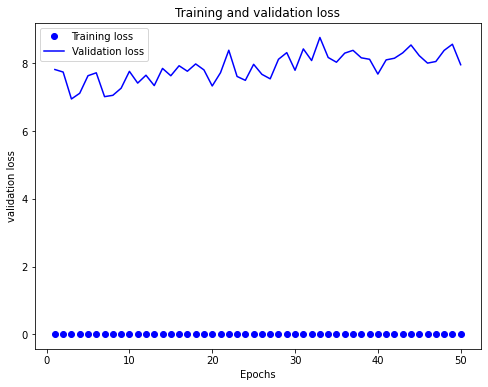

In [99]:
# Plot the loss curves for training and validation.
ANN_histdict = ANN_hist.history
accuracy_values = ANN_histdict['loss']
values_loss = ANN_histdict['val_loss']
epochs = range(1, 51)

plt.figure(figsize=(8,6))
plt.plot(epochs,accuracy_values , 'bo', label='Training loss')
plt.plot(epochs, values_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('validation loss')
plt.legend()
plt.show()

In [100]:
original_val_loss = ANN_hist.history['val_loss']
original_train_loss = ANN_hist.history['loss']

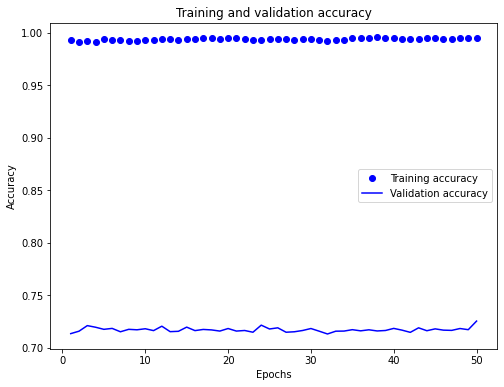

In [101]:
# Plot the loss curves for training and validation.
ANN_histdict = ANN_hist.history
accuracy_values = ANN_histdict['accuracy']
values_loss = ANN_histdict['val_accuracy']
epochs = range(1, 51)

plt.figure(figsize=(8,6))
plt.plot(epochs,accuracy_values , 'bo', label='Training accuracy')
plt.plot(epochs, values_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**L1-regularizer**

In [102]:
from keras import models
from keras import layers
from keras import regularizers

l1_model = models.Sequential()
l1_model.add(layers.Dense(20, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu', input_shape=(X_train.shape[1],)))
l1_model.add(layers.Dense(20, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [103]:
l1_model_hist = l1_model.fit(X_train, y_train_df,epochs=50,batch_size=512,validation_split=0.2)

Epoch 1/50
71/71 [==============================] - 2s 9ms/step - loss: 0.5802 - acc: 0.8892 - val_loss: 0.9237 - val_acc: 0.6842
Epoch 2/50
71/71 [==============================] - 0s 6ms/step - loss: 0.3727 - acc: 0.9327 - val_loss: 0.9019 - val_acc: 0.6842
Epoch 3/50
71/71 [==============================] - 0s 6ms/step - loss: 0.3225 - acc: 0.9327 - val_loss: 0.8453 - val_acc: 0.6842
Epoch 4/50
71/71 [==============================] - 0s 6ms/step - loss: 0.2874 - acc: 0.9327 - val_loss: 0.8306 - val_acc: 0.6842
Epoch 5/50
71/71 [==============================] - 0s 6ms/step - loss: 0.2664 - acc: 0.9327 - val_loss: 0.7904 - val_acc: 0.6842
Epoch 6/50
71/71 [==============================] - 0s 6ms/step - loss: 0.2538 - acc: 0.9327 - val_loss: 0.7996 - val_acc: 0.6842
Epoch 7/50
71/71 [==============================] - 0s 6ms/step - loss: 0.2459 - acc: 0.9327 - val_loss: 0.7850 - val_acc: 0.6842
Epoch 8/50
71/71 [==============================] - 0s 6ms/step - loss: 0.2392 - acc: 0.93

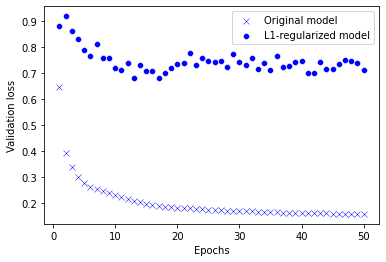

In [ ]:
l1_loss = l1_model_hist.history['loss']
l1_model_val_loss = l1_model_hist.history['val_loss']

def modelplot_L1():
  sns.scatterplot(x=epochs, y=l1_loss, color="b", marker='x', label='Original model')
  sns.scatterplot(x=epochs, y=l1_model_val_loss, color="b", marker='o', label='L1-regularized model')
  plt.xlabel('Epochs')
  plt.ylabel('Validation loss')
  plt.legend()

modelplot_L1()

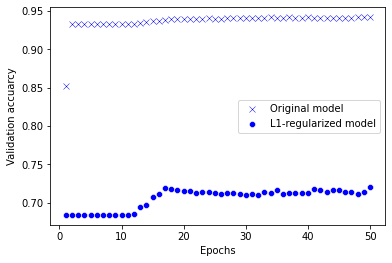

In [ ]:
l1_acc = l1_model_hist.history['acc']
l1_model_val_acc = l1_model_hist.history['val_acc']

def modelplot_L1():
  sns.scatterplot(x=epochs, y=l1_acc, color="b", marker='x', label='Original model')
  sns.scatterplot(x=epochs, y=l1_model_val_acc, color="b", marker='o', label='L1-regularized model')
  plt.xlabel('Epochs')
  plt.ylabel('Validation accuarcy')
  plt.legend()

modelplot_L1()

**L2-regularizer**

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(20, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(X_train.shape[1],)))
l2_model.add(layers.Dense(20, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
l2_model_hist = l2_model.fit(X_train, y_train_df,
                             epochs=50,
                             batch_size=512,
                             validation_split=0.2)

Epoch 1/50
71/71 [==============================] - 1s 9ms/step - loss: 0.3528 - acc: 0.9304 - val_loss: 0.8237 - val_acc: 0.6842
Epoch 2/50
71/71 [==============================] - 0s 6ms/step - loss: 0.2707 - acc: 0.9327 - val_loss: 0.8020 - val_acc: 0.6842
Epoch 3/50
71/71 [==============================] - 0s 6ms/step - loss: 0.2561 - acc: 0.9327 - val_loss: 0.7532 - val_acc: 0.6842
Epoch 4/50
71/71 [==============================] - 0s 6ms/step - loss: 0.2457 - acc: 0.9327 - val_loss: 0.7336 - val_acc: 0.6842
Epoch 5/50
71/71 [==============================] - 0s 6ms/step - loss: 0.2360 - acc: 0.9328 - val_loss: 0.7010 - val_acc: 0.6848
Epoch 6/50
71/71 [==============================] - 0s 6ms/step - loss: 0.2256 - acc: 0.9329 - val_loss: 0.6980 - val_acc: 0.6938
Epoch 7/50
71/71 [==============================] - 0s 6ms/step - loss: 0.2154 - acc: 0.9333 - val_loss: 0.7129 - val_acc: 0.6949
Epoch 8/50
71/71 [==============================] - 0s 6ms/step - loss: 0.2040 - acc: 0.93

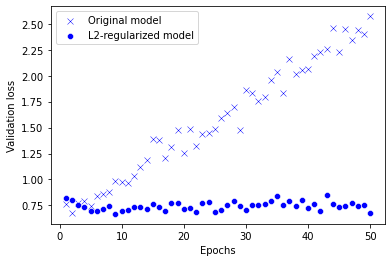

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

def modelplot_L2():
  sns.scatterplot(x=epochs, y=original_val_loss, color="b", marker='x', label='Original model')
  sns.scatterplot(x=epochs, y=l2_model_val_loss, color="b", marker='o', label='L2-regularized model')
  plt.xlabel('Epochs')
  plt.ylabel('Validation loss')
  plt.legend()

modelplot_L2()

**Adding Dropout**

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(20, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(X_train, y_train_df,
                               epochs=50,
                               batch_size=512,
                               validation_split=0.2)

Epoch 1/50
71/71 [==============================] - 3s 16ms/step - loss: 0.5687 - acc: 0.6904 - val_loss: 0.6528 - val_acc: 0.6842
Epoch 2/50
71/71 [==============================] - 1s 11ms/step - loss: 0.3333 - acc: 0.9149 - val_loss: 0.7875 - val_acc: 0.6842
Epoch 3/50
71/71 [==============================] - 1s 10ms/step - loss: 0.2957 - acc: 0.9315 - val_loss: 0.7809 - val_acc: 0.6842
Epoch 4/50
71/71 [==============================] - 1s 11ms/step - loss: 0.2801 - acc: 0.9326 - val_loss: 0.7643 - val_acc: 0.6842
Epoch 5/50
71/71 [==============================] - 1s 10ms/step - loss: 0.2700 - acc: 0.9327 - val_loss: 0.7638 - val_acc: 0.6842
Epoch 6/50
71/71 [==============================] - 1s 11ms/step - loss: 0.2657 - acc: 0.9327 - val_loss: 0.7579 - val_acc: 0.6842
Epoch 7/50
71/71 [==============================] - 1s 11ms/step - loss: 0.2550 - acc: 0.9327 - val_loss: 0.7779 - val_acc: 0.6842
Epoch 8/50
71/71 [==============================] - 1s 10ms/step - loss: 0.2490 - a

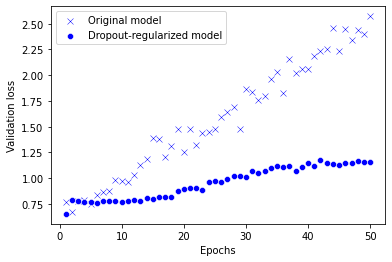

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

def modelplot_Drop():
  sns.scatterplot(x=epochs, y=original_val_loss, color="b", marker='x', label='Original model')
  sns.scatterplot(x=epochs, y=dpt_model_val_loss, color="b", marker='o', label='Dropout-regularized model')
  plt.xlabel('Epochs')
  plt.ylabel('Validation loss')
  plt.legend()

modelplot_Drop()

**Comparison of loss**

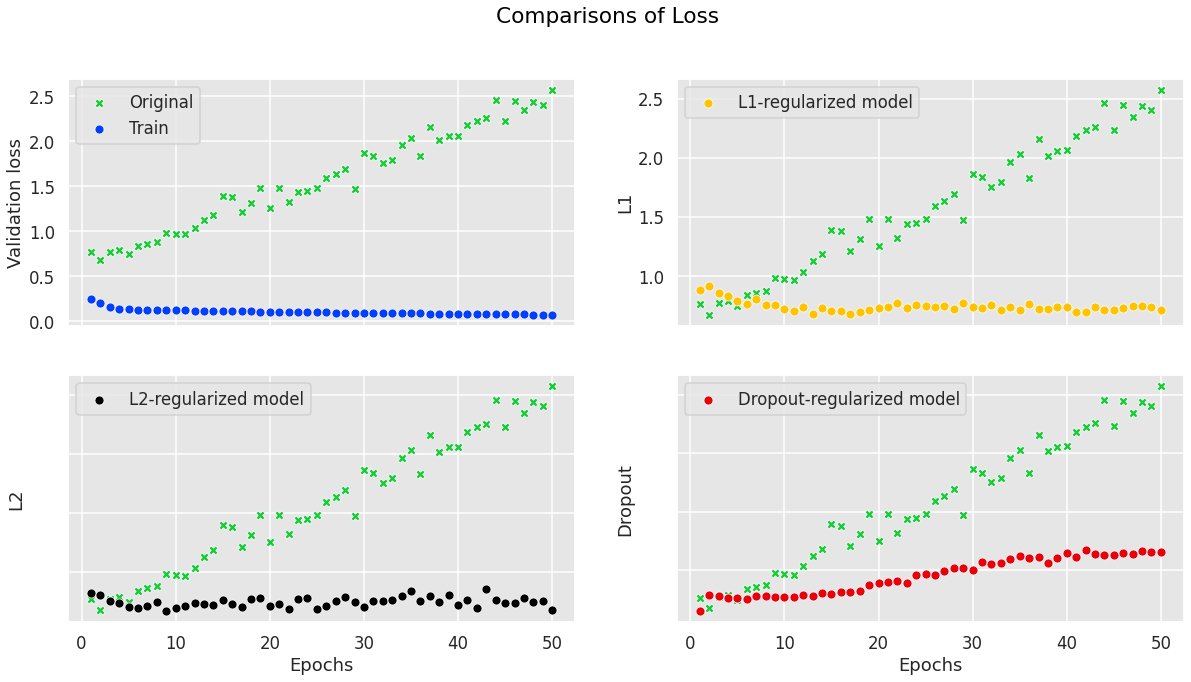

In [ ]:
# Layout all plots into one figure for easy comparison

f = plt.figure(figsize=(20, 10))
gs = f.add_gridspec(2, 2)

f.suptitle('Comparisons of Loss')

sns.set_palette("flare", n_colors=8, color_codes=True)
sns.set_color_codes(palette='bright')
#original_diff = np.subtract(original_val_loss, original_train_loss)
with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    sns.set_context("talk")
    ax1 = f.add_subplot(gs[0, 0])
    sns.scatterplot(x=epochs, y=original_val_loss, color="g", marker='X', label='Original')
    sns.scatterplot(x=epochs, y=original_train_loss, color="b", marker='o', label='Train')
    plt.setp(ax1.get_xticklabels(), visible=False)

with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    sns.set_context("talk")
    ax2 = f.add_subplot(gs[0, 1])
    sns.scatterplot(x=epochs, y=original_val_loss, color="g", marker='X')
    sns.scatterplot(x=epochs, y=l1_model_val_loss, color="y", marker='o', label='L1-regularized model')
    plt.setp(ax2.get_xticklabels(), visible=False)

with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    sns.set_context("talk")
    ax3 = f.add_subplot(gs[1, 0])
    sns.scatterplot(x=epochs, y=original_val_loss, color="g", marker='X')
    sns.scatterplot(x=epochs, y=l2_model_val_loss, color="black", marker='o', label='L2-regularized model')
    plt.setp(ax3.get_yticklabels(), visible=False)  

with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    sns.set_context("talk")
    ax4 = f.add_subplot(gs[1, 1])
    sns.scatterplot(x=epochs, y=original_val_loss, color="g", marker='X')
    sns.scatterplot(x=epochs, y=dpt_model_val_loss, color="r", marker='o', label='Dropout-regularized model')
    plt.setp(ax4.get_yticklabels(), visible=False)


ax3.set(xlabel='Epochs')
ax4.set(xlabel='Epochs')


ax1.set(ylabel='Validation loss')
ax3.set(ylabel='L2')


ax2.set(ylabel='L1')
ax4.set(ylabel='Dropout')
#ax5.set(ylabel='Training loss')


#ax6.set(ylabel='Loss difference')

f.align_labels()